In [1]:
!pip install opencv-python

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
image = plt.imread("terrier.jpg")

In [4]:
type(image)

numpy.ndarray

In [5]:
image.shape

(1568, 2352, 3)

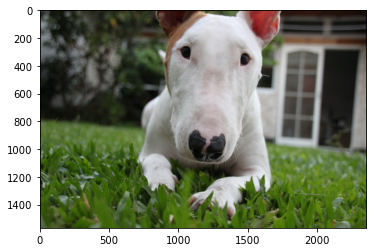

In [6]:
plt.imshow(image)

In [7]:
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

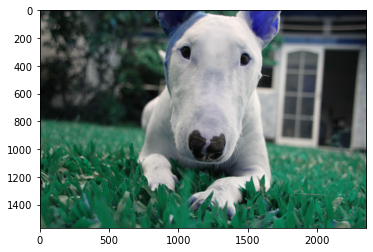

In [8]:
plt.imshow(new_image)

In [9]:
r,g,b = cv2.split(new_image)

new_image = cv2.merge((r,g,b))

In [10]:
s = 10
w = int(new_image.shape[1]*s/100)
h = int(new_image.shape[0]*s/100)
dim = (w,h)
re_size = cv2.resize(new_image, dim, interpolation = cv2.INTER_AREA)
re_size.shape

(156, 235, 3)

In [11]:
(h,w) = new_image.shape[:2]
c = (w/2, h/2)
angle = 90

m = cv2.getRotationMatrix2D(c,angle,1.0)
rotate_90 = cv2.warpAffine(new_image,m,(h,w))

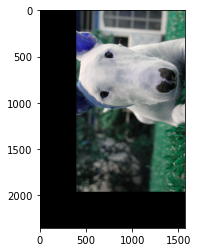

In [12]:
plt.imshow(rotate_90)

In [13]:
yolo = cv2.dnn.readNet("yolov3-tiny.weights","yolov3-tiny.cfg")

In [14]:
classes = []

with open("coco.names", 'r') as f:
    classes = f.read().splitlines()

In [15]:
len(classes)

80

In [16]:
img = cv2.imread("terrier.jpg")
 
blob = cv2.dnn.blobFromImage(img, 1/255,(320,320),(0,0,0),swapRB=True, crop = False)

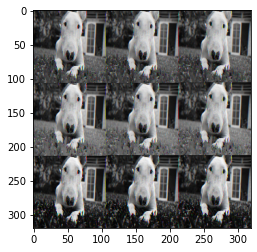

In [17]:
i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [18]:
yolo.setInput(blob)

In [19]:
output_layes_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layes_name)

In [20]:
boxes = []
confidence = []
class_ids = []

for output in layeroutput :
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.7:
            center_x = int(detection[0]*width)
            center_y = int(detection[0]*height)
            w = int(detection[0]*width)
            h = int(detection[0]*height)
            
            x = int(center_x-w/2)
            y = int(center_y-h/2)
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [21]:
len(boxes)

0

In [22]:
indexes = cv2.dnn.NMSBoxes(boxes,confidence,0.5,0.4)

TypeError: Can't parse 'scores'. Input argument doesn't provide sequence protocol

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size = (len(boxes),3))

In [ ]:
for i in indexes.flatten():
    x,y,w,h = boxes[i]
    
    label = str(classes[class_ids[i]])
    confi = str(round(confidence[i]),2)
    color = colors[i]
    
    cv2.rectancgle(img,(x,y),(x+w,y+h),color,3)
    cv2.putText(img,label +" "+confi,(x,y+20),font,2,(255,255,255),3)